In [1]:
!nvidia-smi

Tue May  6 06:54:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Fetch dataset

In [2]:
!git clone https://github.com/pekatour/Charlie-DB.git
!mkdir datasets
!cp -r ./Charlie-DB/dataset datasets/dataset
!cp ./Charlie-DB/data.yaml data.yaml
!pip install ultralytics

Cloning into 'Charlie-DB'...
remote: Enumerating objects: 1943, done.
remote: Counting objects: 100% (1481/1481), done.
remote: Compressing objects: 100% (971/971), done.
remote: Total 1943 (delta 90), reused 1364 (delta 25), pack-reused 462 (from 1)
Receiving objects: 100% (1943/1943), 270.52 MiB | 44.19 MiB/s, done.
Resolving deltas: 100% (225/225), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━

In [3]:
!ls datasets/dataset

test  train  valid


Run this only if you want to reimport the dataset

In [22]:
!rm -rf datasets/
!mkdir datasets

# Train

In [4]:
# Import necessary libraries
from ultralytics import YOLO

# Load a pretrained YOLO model
model = YOLO('yolo11n.pt') # Or any other suitable model

# Train the model
results = model.train(data='./data.yaml', epochs=50, imgsz=300) # Adjust parameters as needed



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 108MB/s]


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=300, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=

100%|██████████| 755k/755k [00:00<00:00, 22.1MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,620 parameters, 2,590,604 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
WARNING ⚠️ imgsz=[300] must be multiple of max stride 32, updating to [320]
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 25.3±4.8 MB/s, size: 64.4 KB)


train: Scanning /content/datasets/dataset/train/labels... 253 images, 0 backgrounds, 11 corrupt: 100%|██████████| 253/253 [00:00<00:00, 499.08it/s]

train: /content/datasets/dataset/train/images/1-1-0-1.jpg: ignoring corrupt image/label: negative label values [  -0.063333]
train: /content/datasets/dataset/train/images/1-1-0-7.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0633]
train: /content/datasets/dataset/train/images/1-2-0-4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0233]
train: /content/datasets/dataset/train/images/2-3-0-3.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0033]
train: /content/datasets/dataset/train/images/2-4-0-2.jpg: ignoring corrupt image/label: negative label values [  -0.086667]
train: /content/datasets/dataset/train/images/2-4-0-3.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0867]
train: /content/datasets/dataset/train/images/2-5-0-0.jpg: ignoring corrupt image/label: negative label values [      -0.05]
train: /content/datasets/dataset/trai

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 20.1±5.5 MB/s, size: 71.6 KB)


val: Scanning /content/datasets/dataset/valid/labels... 28 images, 0 backgrounds, 2 corrupt: 100%|██████████| 28/28 [00:00<00:00, 251.52it/s]

val: /content/datasets/dataset/valid/images/2-3-0-0.jpg: ignoring corrupt image/label: negative label values [ -0.0033333]
val: /content/datasets/dataset/valid/images/2-5-0-3.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [       1.05]
val: New cache created: /content/datasets/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.658G      2.343      4.384      1.846          4        320: 100%|██████████| 16/16 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         26         29    0.00045     0.0563     0.0218     0.0143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.742G      1.981      4.007       1.58          3        320: 100%|██████████| 16/16 [00:02<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

                   all         26         29    0.00041     0.0563     0.0122    0.00765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.758G       2.03       3.79      1.548          3        320: 100%|██████████| 16/16 [00:03<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]

                   all         26         29    0.00175      0.229     0.0208     0.0124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.771G      2.046      3.667      1.524          2        320: 100%|██████████| 16/16 [00:02<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         26         29    0.00277      0.558     0.0575     0.0251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.787G      1.976      3.288      1.483          2        320: 100%|██████████| 16/16 [00:02<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         26         29       0.02      0.115     0.0441     0.0175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.803G      1.882      3.019      1.471          2        320: 100%|██████████| 16/16 [00:02<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]

                   all         26         29     0.0507      0.146     0.0667     0.0262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.816G      1.916      3.039      1.484          2        320: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         26         29       0.43       0.21      0.131     0.0556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.832G      1.908      2.769      1.438          5        320: 100%|██████████| 16/16 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all         26         29      0.158      0.298     0.0963     0.0435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.846G      1.805      2.686      1.462          6        320: 100%|██████████| 16/16 [00:02<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         26         29      0.163      0.344      0.197      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.861G      1.886      2.657      1.497          3        320: 100%|██████████| 16/16 [00:02<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]

                   all         26         29      0.103        0.2      0.124     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.877G      1.725      2.426      1.401          2        320: 100%|██████████| 16/16 [00:02<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all         26         29      0.249       0.27      0.166     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.891G      1.777      2.341      1.433          3        320: 100%|██████████| 16/16 [00:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         26         29      0.319      0.303      0.246      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.906G      1.693      2.271      1.388          5        320: 100%|██████████| 16/16 [00:02<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.66it/s]

                   all         26         29      0.226      0.366      0.252       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      0.92G      1.693      2.137      1.395          5        320: 100%|██████████| 16/16 [00:02<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         26         29      0.234       0.36      0.232      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.936G      1.609       2.18      1.333          1        320: 100%|██████████| 16/16 [00:02<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]

                   all         26         29      0.394      0.345      0.314      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.949G      1.652       2.13      1.379          2        320: 100%|██████████| 16/16 [00:02<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         26         29      0.338      0.342      0.283      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.965G      1.641      2.012      1.378          2        320: 100%|██████████| 16/16 [00:02<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         26         29      0.391       0.43      0.293      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.979G      1.609      2.005      1.331          3        320: 100%|██████████| 16/16 [00:02<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.10it/s]

                   all         26         29      0.327      0.509      0.363      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.994G       1.68      1.931      1.345          4        320: 100%|██████████| 16/16 [00:02<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all         26         29      0.416      0.425      0.358      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.01G      1.663      1.989      1.339          2        320: 100%|██████████| 16/16 [00:02<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]

                   all         26         29       0.79      0.216      0.346      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.02G      1.637      1.831      1.326          5        320: 100%|██████████| 16/16 [00:02<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


                   all         26         29      0.555      0.335      0.422      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.04G      1.629      1.896      1.323          6        320: 100%|██████████| 16/16 [00:02<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         26         29      0.391      0.362      0.372      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.05G       1.57      1.828      1.296          1        320: 100%|██████████| 16/16 [00:02<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         26         29      0.354      0.434      0.358      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.07G      1.534      1.727      1.273          5        320: 100%|██████████| 16/16 [00:02<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.47it/s]

                   all         26         29       0.29      0.523      0.345      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.08G      1.459      1.636      1.246          2        320: 100%|██████████| 16/16 [00:02<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

                   all         26         29      0.485      0.323      0.336      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       1.1G      1.517      1.718      1.271          2        320: 100%|██████████| 16/16 [00:02<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         26         29      0.751      0.256      0.374      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.11G      1.455       1.66      1.275          2        320: 100%|██████████| 16/16 [00:02<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]

                   all         26         29      0.437      0.446      0.365      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.13G      1.489      1.585      1.287          2        320: 100%|██████████| 16/16 [00:02<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         26         29      0.715      0.339      0.483      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.14G      1.482      1.517      1.269          3        320: 100%|██████████| 16/16 [00:02<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all         26         29      0.545      0.478      0.469      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.16G      1.487      1.601      1.265          1        320: 100%|██████████| 16/16 [00:02<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         26         29      0.483      0.586      0.525      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.17G      1.441      1.502      1.235          9        320: 100%|██████████| 16/16 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         26         29      0.503      0.614      0.562      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.19G      1.436      1.448      1.241          5        320: 100%|██████████| 16/16 [00:02<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.35it/s]

                   all         26         29      0.387      0.589      0.474       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       1.2G      1.384      1.463      1.233          7        320: 100%|██████████| 16/16 [00:02<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all         26         29      0.497        0.6      0.527      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.21G      1.355      1.439      1.202          2        320: 100%|██████████| 16/16 [00:02<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]

                   all         26         29      0.527        0.6      0.629       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.23G      1.343      1.414      1.185          4        320: 100%|██████████| 16/16 [00:02<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         26         29      0.453      0.693      0.604      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.24G      1.348      1.393      1.179          3        320: 100%|██████████| 16/16 [00:02<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         26         29      0.775      0.478       0.61      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.26G      1.337      1.343      1.186          4        320: 100%|██████████| 16/16 [00:02<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all         26         29       0.76      0.441      0.611      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.28G      1.329      1.388      1.173          3        320: 100%|██████████| 16/16 [00:02<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         26         29      0.645      0.559      0.651      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.29G      1.288      1.314      1.158          2        320: 100%|██████████| 16/16 [00:02<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.39it/s]

                   all         26         29      0.649      0.479      0.616      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       1.3G      1.314       1.31      1.167          4        320: 100%|██████████| 16/16 [00:02<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]

                   all         26         29      0.626      0.515      0.599        0.3


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.32G      1.202      1.232       1.15          2        320: 100%|██████████| 16/16 [00:02<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         26         29       0.48      0.531      0.519      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.33G      1.317      1.288      1.192          2        320: 100%|██████████| 16/16 [00:02<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]

                   all         26         29      0.533      0.567      0.568      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.35G      1.261      1.206      1.162          2        320: 100%|██████████| 16/16 [00:01<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all         26         29      0.577      0.647      0.647      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.36G      1.203      1.139      1.117          2        320: 100%|██████████| 16/16 [00:02<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.95it/s]

                   all         26         29      0.533      0.606      0.618      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.38G       1.14      1.202      1.118          2        320: 100%|██████████| 16/16 [00:02<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]

                   all         26         29      0.531      0.639      0.662       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.39G      1.216      1.149      1.138          2        320: 100%|██████████| 16/16 [00:01<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]

                   all         26         29      0.644       0.54      0.632      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.41G      1.147      1.095      1.115          2        320: 100%|██████████| 16/16 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         26         29      0.716      0.521       0.66      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.42G      1.168      1.141      1.142          2        320: 100%|██████████| 16/16 [00:01<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         26         29      0.697      0.538      0.658      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.44G       1.21       1.18      1.129          2        320: 100%|██████████| 16/16 [00:02<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all         26         29       0.74      0.613      0.679      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.45G      1.111      1.077      1.095          2        320: 100%|██████████| 16/16 [00:01<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         26         29      0.757      0.578      0.684      0.389



50 epochs completed in 0.039 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


                   all         26         29      0.758      0.577      0.684      0.389
               Charlie          8          8      0.673      0.625       0.63      0.405
                 Odlaw          6          6      0.896        0.5      0.696      0.401
                 Wenda         10         10          1      0.783      0.895      0.458
     Wizard Whitebeard          5          5      0.464        0.4      0.515      0.292
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


In [5]:
# Résultats
metrics = model.val()
print(metrics.box.map)

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1086.7±502.1 MB/s, size: 76.2 KB)


val: Scanning /content/datasets/dataset/valid/labels.cache... 28 images, 0 backgrounds, 2 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]

val: /content/datasets/dataset/valid/images/2-3-0-0.jpg: ignoring corrupt image/label: negative label values [ -0.0033333]
val: /content/datasets/dataset/valid/images/2-5-0-3.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [       1.05]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]


                   all         26         29      0.758      0.577      0.682      0.388
               Charlie          8          8       0.67      0.625       0.63      0.405
                 Odlaw          6          6      0.896        0.5       0.69      0.398
                 Wenda         10         10          1      0.785      0.895      0.458
     Wizard Whitebeard          5          5      0.464        0.4      0.514      0.292
Speed: 1.1ms preprocess, 23.8ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/train2
0.3880779849638742


# Check

In [7]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=./datasets/dataset/test/images save=True

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/42 /content/datasets/dataset/test/images/1-1-0-4.jpg: 320x320 1 Odlaw, 1 Wizard Whitebeard, 14.3ms
image 2/42 /content/datasets/dataset/test/images/1-12-0-2.jpg: 320x320 1 Charlie, 9.3ms
image 3/42 /content/datasets/dataset/test/images/1-2-0-0.jpg: 320x320 1 Charlie, 8.2ms
image 4/42 /content/datasets/dataset/test/images/1-2-0-1.jpg: 320x320 1 Charlie, 7.7ms
image 5/42 /content/datasets/dataset/test/images/1-5-0-2.jpg: 320x320 1 Wenda, 8.5ms
image 6/42 /content/datasets/dataset/test/images/1-6-0-2.jpg: 320x320 1 Odlaw, 8.1ms
image 7/42 /content/datasets/dataset/test/images/1-9-0-0.jpg: 320x320 1 Charlie, 7.8ms
image 8/42 /content/datasets/dataset/test/images/2-1-0-7.jpg: 320x320 1 Odlaw, 7.8ms
image 9/42 /content/datasets/dataset/test/images/2-1-0-8.jpg: 320x320 1 Charlie, 7.9ms
image 10/42 /content/datasets/datas

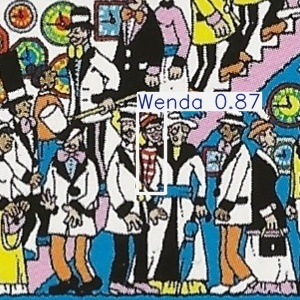

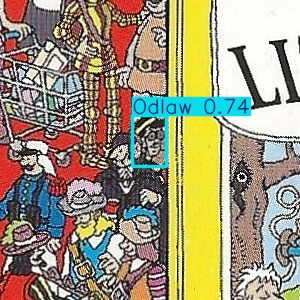

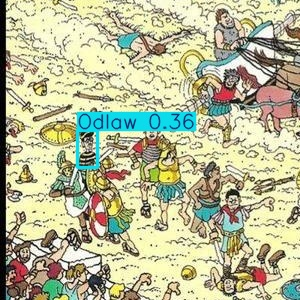

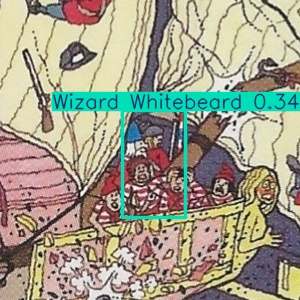

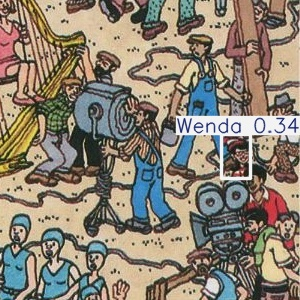

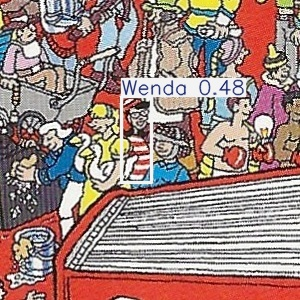

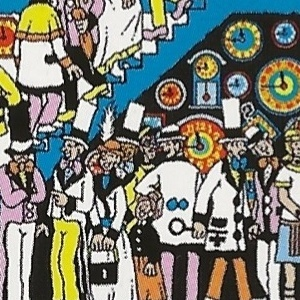

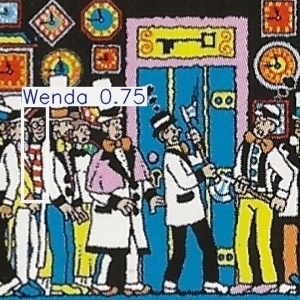

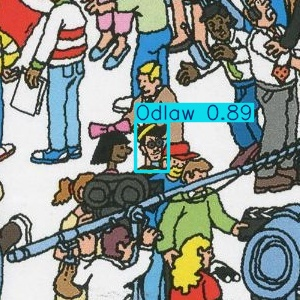

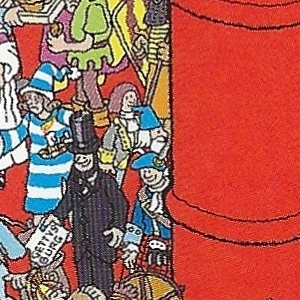

In [10]:
import glob
import random
from IPython.display import Image, display
for image_path in random.sample(glob.glob(f'/content/runs/detect/predict/*.jpg'),10):
  display(Image(filename=image_path, height=400))
  print('\n')

# Export

In [13]:
from google.colab import files
!zip -r train.zip runs/detect/train/
files.download('train.zip')

  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/labels_correlogram.jpg (deflated 53%)
  adding: runs/detect/train/train_batch640.jpg (deflated 5%)
  adding: runs/detect/train/P_curve.png (deflated 9%)
  adding: runs/detect/train/labels.jpg (deflated 39%)
  adding: runs/detect/train/val_batch0_pred.jpg (deflated 6%)
  adding: runs/detect/train/confusion_matrix.png (deflated 30%)
  adding: runs/detect/train/weights/ (stored 0%)
  adding: runs/detect/train/weights/last.pt (deflated 10%)
  adding: runs/detect/train/weights/.ipynb_checkpoints/ (stored 0%)
  adding: runs/detect/train/weights/best.pt (deflated 10%)
  adding: runs/detect/train/train_batch1.jpg (deflated 1%)
  adding: runs/detect/train/train_batch2.jpg (deflated 1%)
  adding: runs/detect/train/F1_curve.png (deflated 9%)
  adding: runs/detect/train/train_batch0.jpg (deflated 0%)
  adding: runs/detect/train/val_batch0_labels.jpg (deflated 6%)
  adding: runs/detect/train/train_batch641.jpg (deflated 2%)
  addi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Optionnel
model.export(format="onnx")